<div style="text-align: center; font-family: Arial, sans-serif; margin-top: 50px;">
<h1 style="font-size: 36px; font-weight: bold; color: #4CAF50;">Mini-projet 2 - Équation de Newton</h1>
<h2 style="font-size: 20px; font-weight: bold; color: #4CAF50;">PHS3903</h2>
<h2 style="font-size: 20px; margin-bottom: 20px;"> Marie-Lou Dessureault, Elliott Menu, Tendano Yehama Bantia Luther</h2> 
<h2 style="font-size: 16px; margin-bottom: 10px;">2211129, 2147422, 2141649 </h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">31 janvier 2025</h2>
<h2 style="font-size: 16px; margin-bottom: 10px;">Shawn Molesky, Maksim Skorobogatiy, Jérémie Villeneuve</h2>
</div>


## 1 – Définir la méthode numérique
En utilisant un maillage avec un pas de temps ∆t uniforme :
$$
t_n = n∆t, n = 0, 1, . . . 
$$
ainsi qu’une formule de différences finies centrée à trois points pour la dérivée seconde et une
formule centrée à deux points pour la dérivée première :


(a) [6 pts] Montrer qu’on obtient la méthode d’Euler explicite suivante :
$$
θ_1 = θ_0 + (1 − \frac{β∆t}{2})ω_0∆t − (\frac{g}{2L}∆t^2)sin(θ_0)
$$
$$
θ_{n+1} = \frac{4θ_n − (2 − β∆t)θ_{n−1} − (\frac{g}{L}∆t^2)sin(θ_n)}{2 + β∆t}, \ \  n = 1, 2, . . . 
$$
et spécifier son ordre de convergence.

Réponse (a) :

## 2 – Choisir un pas de temps adéquat d’un point de vue physique
Il est important que le pas choisi permette de bien représenter les phénomènes physiques à simuler.


(b) [2 pts] Déterminer la ou les échelles de temps associées au mouvement du pendule en fonction
des paramètres du problème, puis expliquer comment le pas ∆t devrait être choisi pour que
la simulation puisse décrire adéquatement la situation étudiée.


Réponse (b)

(c) [2 pts] Expliquer ce qui se passerait si vous choisissiez un pas de temps légèrement supérieur
et largement supérieur à la valeur de stabilité déterminée.

Réponse (c)

## 3 – Implémenter la méthode numérique
Modifier le code fourni afin d’implémenter la méthode numérique (5)–(6), puis répondre aux questions suivantes pour le cas spécifique : g = 9,81 $m/s^2$, m = 1,0 kg, L = 100 cm, β = 0,1 $s^{−1}$, $\theta_0$ = $\pi$/6 rad et $\omega_0$ = 5 rad/s.

(d) [2 pts] Choisir une valeur de pas de temps $\Delta t = \Delta t_0$ appropriée, puis tracer un graphique
de $\theta(t)$ en fonction de $t$ pour ce pas de temps.

Réponse (d):

Le pas de temps $\Delta t_0$ a été choisi selon la condition déterminée au (b), soit $\Delta t_0=0.2$ s.


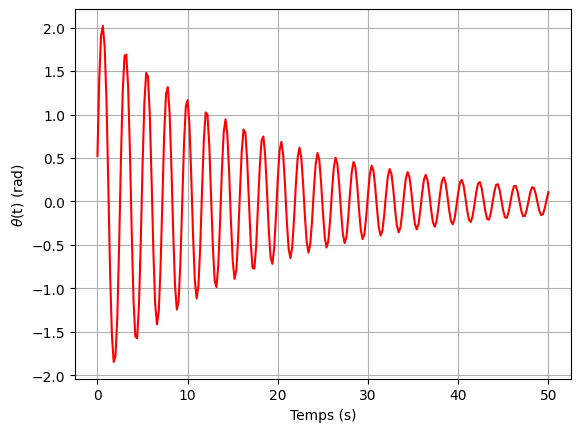

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres physiques du problème
g = 9.81     # Champ gravitationnel (m²/s)
m = 1.000    # Masse du pendule (kg)
L = 1.000    # Longueur du câble (m)
beta = 0.1   # Constante d'amortissement (1/s)

# Conditions initiales
theta0 = np.pi/6        # Position initiale (rad)
omega0 = 5              # Vitesse inititale (rad/s)

# Paramètres généraux de simulation
tf = 50              # Temps final (s)
dt0 = 0.2      # Pas de temps le plus élevé (s)
N = tf/dt0            # Nombre d'itérations (conseil : s'assurer que dt soit un multiple entier de tf)

# Initialisation
t = np.arange(0, tf + dt0, dt0)  # Vecteur des valeurs t_n
theta = np.zeros(int(N + 1))  # Vecteur des valeurs theta_n
theta[0] = theta0
theta[1] = theta0 + (1 - (beta * dt0) / 2) * omega0 * dt0 - (g / (2 * L) * (dt0 ** 2)) * np.sin(theta0) 

# Exécution
for n in range(2, int(N + 1)):
    theta[n] = (4 * theta[n-1] - (2 - beta * dt0) * theta[n-2] - ((2 * g) / L * (dt0 ** 2)) * np.sin(theta[n-1])) / (2 + beta * dt0)

plt.plot(t, theta, color='red')
plt.xlabel('Temps (s)')
plt.ylabel(r'$\theta$(t) (rad)')
plt.grid()
plt.show()

(e) [2 pts] Calculer la position finale du pendule au temps $t_f$ = 10 s pour chacun des pas de
temps suivants :
$$
\Delta t ∈ \{\Delta t_0, \frac{\Delta t_0}{2}, \frac{\Delta t_0}{4}, \frac{\Delta t_0}{8}, \frac{\Delta t_0}{16} \}
$$
Présenter vos résultats à l’aide d’un tableau.

Réponse (e):
<table border="1" width="75%" align="center">
    <caption>Tableau 1: Position finale du pendule au temps t<sub>f</sub> = 10 s pour certains pas de temps &Delta;t</caption>
    <tr>
        <td> &Delta;t (s)</td>
        <th> &Delta;t<sub>0</sub></th>
        <th> &Delta;t<sub>0</sub> / 2</th>
        <th> &Delta;t<sub>0</sub> / 4</th>
        <th> &Delta;t<sub>0</sub> / 8</th>
        <th> &Delta;t<sub>0</sub> / 16</th>
    </tr>
    <tr>
        <td>Position finale (rad) </sub></td>
        <td>1.1660637</td>
        <td>1.09566444</td>
        <td>1.07930468</td>
        <td>1.07534759</td>
        <td>1.07436713</td>  
    </tr>
</table>

In [17]:
# Boucle sur le nombre de simulations                                      
dt_val = [dt0, dt0/2, dt0/4, dt0/8, dt0/16]         # Vecteur des pas de temps pour chaque simulation
K = len(dt_val)                                     # Nombre de simulations
thetaf = np.zeros(K)                                # Vecteur des positions finales pour chaque simulation
tf_2 = 10                                           # Temps final (s)

for k in range(0,K):
# Paramètres spécifiques de la simulation
    dt = dt_val[k]               # Pas de temps de la simulation
    N = tf_2/dt                  # Nombre d'itérations (conseil : s'assurer que dt soit un multiple entier de tf)

# Initialisation
    t = np.arange(0, tf_2 + dt, dt)  # Vecteur des valeurs t_n
    theta = np.zeros(int(N + 1))     # Vecteur des valeurs theta_n
    theta[0] = theta0
    theta[1] = theta0 + (1 - (beta * dt) / 2) * omega0 * dt - (g / (2 * L) * (dt ** 2)) * np.sin(theta0) 

# Exécution
    for n in range(2, int(N + 1)):
        theta[n] = (4 * theta[n-1] - (2 - beta * dt) * theta[n-2] - ((2 * g) / L * (dt ** 2)) * np.sin(theta[n-1])) / (2 + beta * dt)

    thetaf[k] = theta[-1]  # Position au temps final tf

print(thetaf)

[1.1660637  1.09566444 1.07930468 1.07534759 1.07436713]


## 4 – Analyser le comportement de l’erreur (convergence)
Le calcul numérique de l’ordre de convergence est une manière de montrer que la méthode a été
programmée correctement, ce qui ajoute de la crédibilité aux résultats produits.

(f) [4 pts] À l’aide des résultats calculés en (c), tracer un graphique de l’erreur $E$ sur la position
finale du lien en fonction du pas de temps $\Delta t$, en utilisant des échelles appropriées pour les
axes et discutez de ce choix.
Rappel. Une méthode numérique est d’ordre $p$ si l’erreur se comporte comme :
$$
E = O(\Delta t^p).
$$
L’erreur exacte ne pouvant pas être calculèe, on utilise la définition suivante de l’erreur :
$$
E(\Delta t) = |\theta(t_f ; \Delta t) − \theta (t_f ; \frac{\Delta t}{2}) |,
$$
qui consiste à calculer la différence absolue entre les résultats de deux simulations avec un
pas $\Delta t$ et un pas $\Delta t/2$.

Réponse (f) :

[]

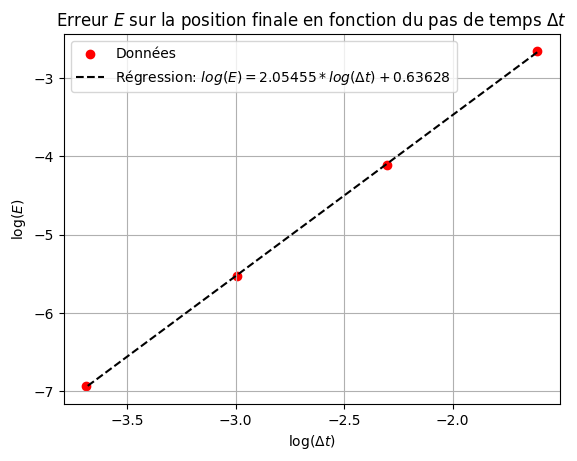

In [25]:
from scipy import stats

E_t = np.zeros(K-1)
log_deltat = np.log(dt_val[0:4])

for n in range(0, K-1):
    E_t[n] = np.abs(thetaf[n]-thetaf[n+1])

log_E_t = np.log(E_t)

reg = stats.linregress(log_deltat, log_E_t)
m = reg.slope
b = reg.intercept

plt.scatter(log_deltat, log_E_t, color='red', label="Données")
plt.plot(log_deltat,(log_deltat * m) + b, "--", label = r"Régression: $log(E)=2.05455*log(\Delta t)+0.63628$", color= "black")
plt.xlabel(r'log($\Delta t$)')
plt.ylabel(r'log($E$)')
plt.title(r'Erreur $E$ sur la position finale en fonction du pas de temps $\Delta t$')
plt.grid()
plt.legend()
plt.plot()

(g) [1 pts] Calculer l’ordre de la méthode à partir du graphique produit.

Réponse (g) :

(h) [1 pts] Déterminer l’effet du pas de temps $\Delta t_0$ choisi sur l’ordre que vous avez calculé.

Réponse (h) :